#### Librerias

In [96]:
import numpy as np
import matplotlib.pyplot as plt

#### Función objetivo

In [97]:
# función objetivo a maximizar
def f(x):
    return 500 * x[0] + 400 * x[1] # funcion objetivo: 

#### Restricciones

In [98]:
# primera restriccion
def g1(x):
    return 300 * x[0] + 400 * x[1] <= 127000   # restricción de $127000 de capital por día.

# segunda restriccion
def g2(x):
    return 20 * x[0] + 10 * x[1] <= 4270   # restriccion: de 4270 horas de mano de obra por día.
#def g2(x): # segunda restricción, reduciendo en una unidad el tiempo de la impresora 2
#    return 20 * x[0] + 9 * x[1] <= 4270   # restriccion: de 4270 horas de mano de obra por día.

#### Parametros

In [99]:
# parametros
n_particles = 10  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1, x2, x3 y x4)
max_iterations = 80  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 2  # coeficientes de aceleracion

w = 0.9 # Factor de inercia
w_dinamico = False # True

factor_contruccion = True #True
phi = 5
chi = 2 / abs(2 - phi - np.sqrt(phi ** 2 - 4 * phi))

#### Inicialización de las particulas

In [100]:
# inicialización de particulas
x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente -infinito)
gbest = np.zeros(n_dimensions)  # mejor solución global
gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)

#### Inicialización de las particulas factibles

In [101]:
# inicializacion de particulas factibles
for i in range(n_particles):
    while True:  # bucle para asegurar que la particula sea factible
        x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
        if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
            break  # Salir del bucle si es factible
    v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
    pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
    fit = f(x[i])  # calculo la aptitud de la posicion inicial
    if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
        pbest_fit[i] = fit  # se actualiza el mejor valor personal

#### Aplicamos la optimización

In [102]:
# Optimizacion

#lista para guardar los gbest
gbest_list = []
gbest_fit_list = []

for i in range(max_iterations):  # Repetir hasta el número máximo de iteraciones

    # w_dinamico
    if w_dinamico:
        w_max = 0.9
        w_min = 0.4
        t_max = max_iterations
        w = w_max - ((w_max - w_min) / t_max) * (i + 1)
        #print("w_dinamico:" , w)

    for i in range(n_particles):
        fit = f(x[i])  # Se calcula la aptitud de la posicion actual
        # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
            pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
            pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
            if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                gbest_fit = fit  # Se actualizar la mejor aptitud global
                gbest = x[i].copy()  # Se actualizar la mejor posicion global

        if factor_contruccion:
            # actualizacion de la velocidad de la particula
            v[i] = chi * (v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i]))
            x[i] += v[i]  # Se actualiza la posicion de la particula
        else:
            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula

        # se asegura de que la nueva posicion esté dentro de las restricciones
        if not (g1(x[i]) and g2(x[i])):
            # Si la nueva posicion no es válida, revertir a la mejor posicion personal
            x[i] = pbest[i].copy()

    gbest_list.append(gbest)
    gbest_fit_list.append(gbest_fit)

In [103]:
# Se imprime la mejor solucion encontrada y también su valor optimo
print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}]")
print(f"Valor optimo: {gbest_fit}")

Mejor solucion: [4.1956, 10.4414]
Valor optimo: 6274.392829439195


#### Punto d, grafico de gbest a través de las iteraciones

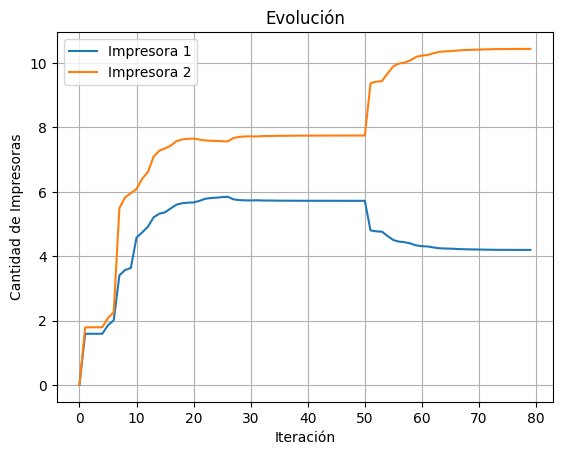

In [104]:
# Grafico de la pieza A:
plt.plot(range(80), [array[0] for array in gbest_list], label="Impresora 1")
plt.plot(range(80), [array[1] for array in gbest_list], label="Impresora 2")
plt.ylabel("Cantidad de Impresoras")
plt.xlabel("Iteración")
plt.title("Evolución")
plt.legend()
plt.grid()

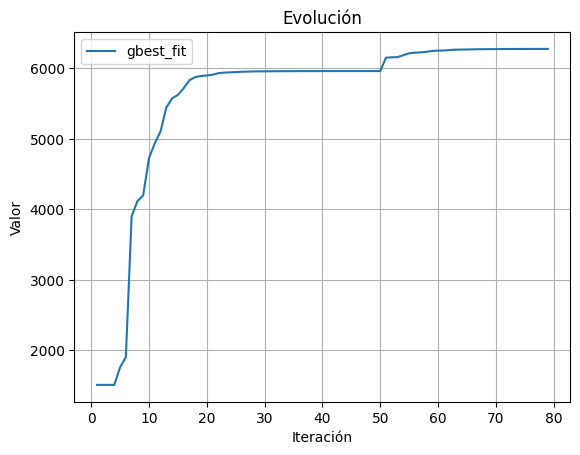

In [105]:
# Grafico de la pieza A:
plt.plot(range(80), gbest_fit_list, label="gbest_fit")
plt.ylabel("Valor")
plt.xlabel("Iteración")
plt.title("Evolución")
plt.legend()
plt.grid()

#### Punto f: Graficar los boxplots.  
- Para este ejercicio se fue ejecutando el codigo caso por caso y se fue almacenando los valores obtenidos.

In [106]:
print([array[0] for array in gbest_list])
print([array[1] for array in gbest_list])
print(gbest_fit_list)

[np.float64(0.0), np.float64(1.5904963557043619), np.float64(1.5895021671038982), np.float64(1.5891224208497488), np.float64(1.5889773706877641), np.float64(1.8566411630039026), np.float64(2.0055467154313056), np.float64(3.4075579662125), np.float64(3.571160080694252), np.float64(3.6336505277949303), np.float64(4.579812581373074), np.float64(4.741451548680656), np.float64(4.9184793563561335), np.float64(5.210168226759563), np.float64(5.321583461113609), np.float64(5.36414029377232), np.float64(5.48662355062457), np.float64(5.602540607626375), np.float64(5.646816983525206), np.float64(5.663729054219893), np.float64(5.670188890405122), np.float64(5.717759361102901), np.float64(5.783089234272865), np.float64(5.80804302534307), np.float64(5.817574525383725), np.float64(5.836343128582778), np.float64(5.847219054703639), np.float64(5.766032335077953), np.float64(5.744220133177802), np.float64(5.735888613421419), np.float64(5.732706256052421), np.float64(5.737915786870819), np.float64(5.73195

In [114]:
w_09_I1 = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(19.23551059779202), np.float64(32.010863838593664), np.float64(48.28937041906363), np.float64(88.50861633570278), np.float64(124.26787108549321), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(105.37200706040134), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.58077435505392), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585), np.float64(106.65106385533585)]
w_09_I2 = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(6.596415867230402), np.float64(37.14616457982115), np.float64(89.84110476314083), np.float64(118.71746933189942), np.float64(166.7964685038703), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(209.83120658613626), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.47568527576288), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785), np.float64(213.68761075307785)]
w_09_fit = [float('-inf'), float('-inf'), float('-inf'), np.float64(12256.321645788172), np.float64(30863.897751225293), np.float64(60081.12711478815), np.float64(91741.29590061116), np.float64(128852.52294429473), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(136618.4861646552), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138680.6612878321), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907), np.float64(138800.57622889907)]

w_DINAMICO_I1  = [np.float64(0.0), np.float64(0.0), np.float64(6.950160214296367), np.float64(17.435458241665827), np.float64(34.05783929969067), np.float64(52.60189380950149), np.float64(65.90463475430212), np.float64(87.95320598314649), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(114.66860877228979), np.float64(115.18846706042494), np.float64(115.18846706042494), np.float64(115.18846706042494), np.float64(115.18846706042494), np.float64(115.18846706042494), np.float64(115.18846706042494), np.float64(115.18846706042494), np.float64(115.18846706042494), np.float64(115.22416746238808), np.float64(115.22416746238808), np.float64(115.22416746238808), np.float64(115.22416746238808), np.float64(115.22416746238808), np.float64(115.22916787422159), np.float64(115.22916787422159), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130086239432), np.float64(115.23130094674474), np.float64(115.23130094674474), np.float64(115.23130094674474), np.float64(115.23130094674474), np.float64(115.23130094674474), np.float64(115.23130094972485), np.float64(115.23130094972485), np.float64(115.23130095044218), np.float64(115.23130095078739), np.float64(115.23130095095136), np.float64(115.23130095102823), np.float64(115.23130095106379), np.float64(115.23130095108), np.float64(115.2313009510873), np.float64(115.23130095109055), np.float64(115.23130095109197), np.float64(115.23130095109258), np.float64(115.23130095109283), np.float64(115.23130095109283), np.float64(115.23130095109288), np.float64(115.23130095109288)]
w_DINAMICO_I2  = [np.float64(0.0), np.float64(0.0), np.float64(2.424237829772981), np.float64(22.2626153868829), np.float64(46.88532585751695), np.float64(70.13261097778053), np.float64(105.00499801152861), np.float64(144.66593387295623), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(195.46739422633098), np.float64(196.45594605250085), np.float64(196.45594605250085), np.float64(196.45594605250085), np.float64(196.45594605250085), np.float64(196.45594605250085), np.float64(196.45594605250085), np.float64(196.45594605250085), np.float64(196.45594605250085), np.float64(196.5238332024437), np.float64(196.5238332024437), np.float64(196.5238332024437), np.float64(196.5238332024437), np.float64(196.5238332024437), np.float64(196.53334188271762), np.float64(196.53334188271762), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739792914695), np.float64(196.53739808954597), np.float64(196.53739808954597), np.float64(196.53739808954597), np.float64(196.53739808954597), np.float64(196.53739808954597), np.float64(196.5373980952129), np.float64(196.5373980952129), np.float64(196.53739809657694), np.float64(196.5373980972334), np.float64(196.5373980975452), np.float64(196.53739809769138), np.float64(196.53739809775897), np.float64(196.5373980977898), np.float64(196.53739809780367), np.float64(196.53739809780984), np.float64(196.53739809781254), np.float64(196.5373980978137), np.float64(196.5373980978142), np.float64(196.5373980978142), np.float64(196.53739809781428), np.float64(196.53739809781428)]
w_DINAMICO_fit = [float('-inf'), float('-inf'), np.float64(4444.775239057376), np.float64(17622.77527558607), np.float64(35783.04999285212), np.float64(54353.99129586296), np.float64(74954.31658176251), np.float64(101842.97654075574), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(135521.2620766773), np.float64(136176.6119512128), np.float64(136176.6119512128), np.float64(136176.6119512128), np.float64(136176.6119512128), np.float64(136176.6119512128), np.float64(136176.6119512128), np.float64(136176.6119512128), np.float64(136176.6119512128), np.float64(136221.61701217154), np.float64(136221.61701217154), np.float64(136221.61701217154), np.float64(136221.61701217154), np.float64(136221.61701217154), np.float64(136227.92069019785), np.float64(136227.92069019785), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60960285593), np.float64(136230.60970919076), np.float64(136230.60970919076), np.float64(136230.60970919076), np.float64(136230.60970919076), np.float64(136230.60970919076), np.float64(136230.60971294757), np.float64(136230.60971294757), np.float64(136230.60971385188), np.float64(136230.60971428704), np.float64(136230.60971449377), np.float64(136230.60971459065), np.float64(136230.60971463547), np.float64(136230.60971465593), np.float64(136230.60971466513), np.float64(136230.6097146692), np.float64(136230.609714671), np.float64(136230.60971467177), np.float64(136230.6097146721), np.float64(136230.6097146721), np.float64(136230.60971467214), np.float64(136230.60971467214)]

w_fc_I1  = [np.float64(0.0), np.float64(1.5904963557043619), np.float64(1.5895021671038982), np.float64(1.5891224208497488), np.float64(1.5889773706877641), np.float64(1.8566411630039026), np.float64(2.0055467154313056), np.float64(3.4075579662125), np.float64(3.571160080694252), np.float64(3.6336505277949303), np.float64(4.579812581373074), np.float64(4.741451548680656), np.float64(4.9184793563561335), np.float64(5.210168226759563), np.float64(5.321583461113609), np.float64(5.36414029377232), np.float64(5.48662355062457), np.float64(5.602540607626375), np.float64(5.646816983525206), np.float64(5.663729054219893), np.float64(5.670188890405122), np.float64(5.717759361102901), np.float64(5.783089234272865), np.float64(5.80804302534307), np.float64(5.817574525383725), np.float64(5.836343128582778), np.float64(5.847219054703639), np.float64(5.766032335077953), np.float64(5.744220133177802), np.float64(5.735888613421419), np.float64(5.732706256052421), np.float64(5.737915786870819), np.float64(5.731957490459827), np.float64(5.729681623745875), np.float64(5.72881232001501), np.float64(5.725092823504544), np.float64(5.725846711733168), np.float64(5.724134249165157), np.float64(5.723480146668639), np.float64(5.722844247165046), np.float64(5.7226205672293124), np.float64(5.722293441759107), np.float64(5.72201482971441), np.float64(5.721933924322444), np.float64(5.721831391415822), np.float64(5.721536513197001), np.float64(5.721399761672477), np.float64(5.721347527238122), np.float64(5.721295832371323), np.float64(5.7211964862172735), np.float64(5.721158539363078), np.float64(4.800174513279239), np.float64(4.7727980742398275), np.float64(4.762341205017712), np.float64(4.626333462876146), np.float64(4.500858633199925), np.float64(4.452931512996213), np.float64(4.434624982061297), np.float64(4.396073760449421), np.float64(4.3350633695079095), np.float64(4.3117594738351706), np.float64(4.302858177758466), np.float64(4.271917845068312), np.float64(4.248157321979802), np.float64(4.2390816097504675), np.float64(4.234536276348204), np.float64(4.225732949623321), np.float64(4.218077993833763), np.float64(4.2139272634384035), np.float64(4.210060367688552), np.float64(4.207423064061528), np.float64(4.20427095261993), np.float64(4.201469854984711), np.float64(4.199019714268345), np.float64(4.198083843791913), np.float64(4.197726373078984), np.float64(4.196595733318081), np.float64(4.1960001637640465), np.float64(4.19577267643707), np.float64(4.195633357236337)]
w_fc_I2  = [np.float64(0.0), np.float64(1.7888567176334453), np.float64(1.7911192135632317), np.float64(1.7919834101090018), np.float64(1.7923135038165257), np.float64(2.0822122847982025), np.float64(2.2565104977174046), np.float64(5.494165480927166), np.float64(5.827114169969292), np.float64(5.954289252673664), np.float64(6.091869884953262), np.float64(6.410328882350723), np.float64(6.617317275798356), np.float64(7.097237020822491), np.float64(7.280550051549528), np.float64(7.350569398706503), np.float64(7.4364479915716135), np.float64(7.574634389609346), np.float64(7.627416896876839), np.float64(7.647578020641582), np.float64(7.655278884668321), np.float64(7.62470725111448), np.float64(7.597309336244721), np.float64(7.586844263985349), np.float64(7.582846962076993), np.float64(7.571983523772526), np.float64(7.5667723648025556), np.float64(7.674663965222953), np.float64(7.708202726966271), np.float64(7.721013394011634), np.float64(7.725906633404405), np.float64(7.720392664577247), np.float64(7.731082871518106), np.float64(7.7351661672227445), np.float64(7.7367258473958), np.float64(7.742163139279467), np.float64(7.741632752976903), np.float64(7.744784598969689), np.float64(7.745988497011628), np.float64(7.74703984938522), np.float64(7.747517921694147), np.float64(7.748094294573503), np.float64(7.748592386365194), np.float64(7.748810188283703), np.float64(7.749002476793437), np.float64(7.749566189902883), np.float64(7.749823837336925), np.float64(7.749922249899615), np.float64(7.750028742470282), np.float64(7.7502254169863), np.float64(7.750300539966698), np.float64(9.374982773361074), np.float64(9.423278762595833), np.float64(9.441726188963212), np.float64(9.681654999098841), np.float64(9.90300262757586), np.float64(9.987549898324898), np.float64(10.019844082094991), np.float64(10.087849964406931), np.float64(10.195476394811369), np.float64(10.236586033138039), np.float64(10.25228851771361), np.float64(10.306869403803425), np.float64(10.348784565904074), np.float64(10.36479473318256), np.float64(10.372812974310168), np.float64(10.388342661417333), np.float64(10.40184650863366), np.float64(10.409168684537576), np.float64(10.41599015901401), np.float64(10.420642538656809), np.float64(10.426203072266118), np.float64(10.431144400643557), np.float64(10.435466614176516), np.float64(10.43711755283947), np.float64(10.43774815529538), np.float64(10.43974268045936), np.float64(10.44079330542761), np.float64(10.441194608456051), np.float64(10.441440377052565)]
w_fc_fit = [float('-inf'), np.float64(1510.790864905559), np.float64(1511.1987689772418), np.float64(1511.3545744684752), np.float64(1511.4140868704922), np.float64(1761.2054954212322), np.float64(1905.3775568026147), np.float64(3901.4451754771167), np.float64(4116.425708334843), np.float64(4198.540964966931), np.float64(4726.654244667841), np.float64(4934.857327280617), np.float64(5106.166588497409), np.float64(5443.978921708778), np.float64(5573.011751176616), np.float64(5622.297906368762), np.float64(5717.89097194093), np.float64(5831.124059656926), np.float64(5874.375250513338), np.float64(5890.895735366579), np.float64(5897.205999069889), np.float64(5908.762580997243), np.float64(5930.468351634321), np.float64(5938.759218265675), np.float64(5941.92604752266), np.float64(5946.964973800399), np.float64(5950.318473272842), np.float64(5952.881753628158), np.float64(5955.391157375409), np.float64(5956.349664315363), np.float64(5956.715781387972), np.float64(5957.114959266308), np.float64(5958.411893837156), np.float64(5958.907278762035), np.float64(5959.096498965824), np.float64(5959.411667464059), np.float64(5959.576457057346), np.float64(5959.980964170454), np.float64(5960.135472138971), np.float64(5960.238063336611), np.float64(5960.317452292315), np.float64(5960.384438708955), np.float64(5960.4443694032825), np.float64(5960.491037474703), np.float64(5960.516686425286), np.float64(5960.5947325596535), np.float64(5960.629415771009), np.float64(5960.642663578907), np.float64(5960.659413173775), np.float64(5960.688409903157), np.float64(5960.699485668218), np.float64(6150.080365984049), np.float64(6155.710542158247), np.float64(6157.861078094141), np.float64(6185.8287310776095), np.float64(6211.630367630307), np.float64(6221.4857158280665), np.float64(6225.2501238686455), np.float64(6233.176865987483), np.float64(6245.722242678503), np.float64(6250.514150172801), np.float64(6252.344495964678), np.float64(6258.706684055526), np.float64(6263.5924873515305), np.float64(6265.458698148257), np.float64(6266.393327898169), np.float64(6268.203539378594), np.float64(6269.777600370346), np.float64(6270.631105534232), np.float64(6271.426247449879), np.float64(6271.968547493488), np.float64(6272.616705216411), np.float64(6273.192687749778), np.float64(6273.696502804779), np.float64(6273.888943031745), np.float64(6273.962448657643), np.float64(6274.194938842785), np.float64(6274.317404053067), np.float64(6274.364181600955), np.float64(6274.392829439195)]

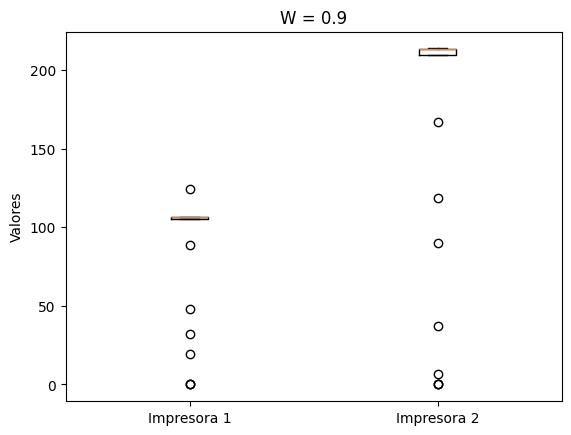

In [115]:
# Grafico de pieza A
data =[w_09_I1, w_09_I2] 

plt.boxplot(data)

# Agregar etiquetas a los ejes
plt.xticks([1, 2], ['Impresora 1', 'Impresora 2'])
plt.ylabel('Valores')
plt.title('W = 0.9')

# Mostrar el gráfico
plt.show()

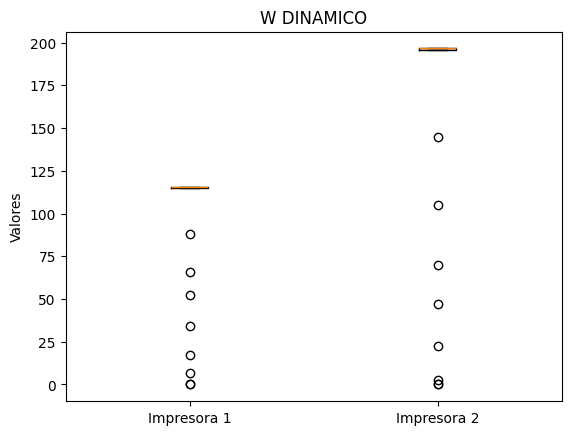

In [116]:
# Grafico de pieza A
data =[w_DINAMICO_I1, w_DINAMICO_I2] 

plt.boxplot(data)

# Agregar etiquetas a los ejes
plt.xticks([1, 2], ['Impresora 1', 'Impresora 2'])
plt.ylabel('Valores')
plt.title('W DINAMICO')

# Mostrar el gráfico
plt.show()

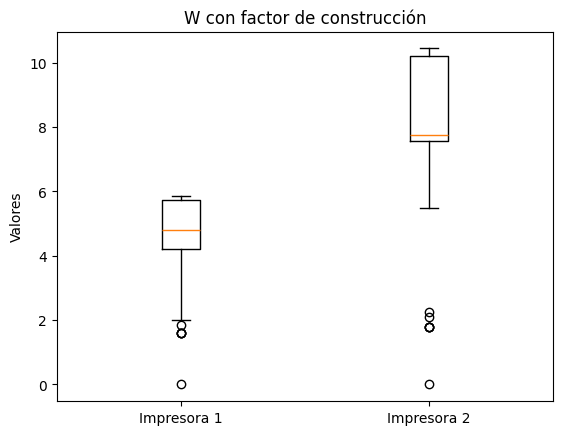

In [117]:
# Grafico de pieza A
data =[w_fc_I1, w_fc_I2] 

plt.boxplot(data)

# Agregar etiquetas a los ejes
plt.xticks([1, 2], ['Impresora 1', 'Impresora 2'])
plt.ylabel('Valores')
plt.title('W con factor de construcción')

# Mostrar el gráfico
plt.show()

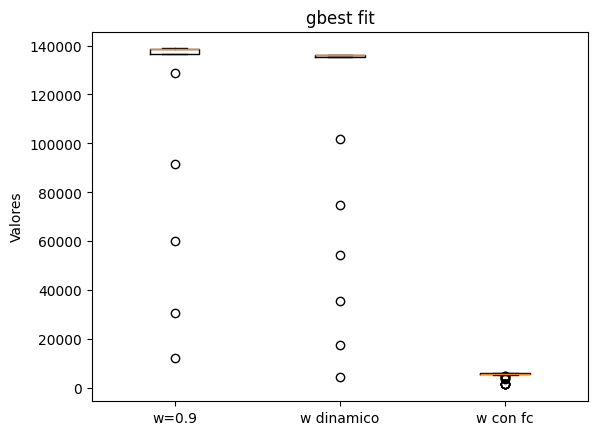

In [118]:
# Grafico del gbest_fit
data =[w_09_fit, w_DINAMICO_fit, w_fc_fit] 

plt.boxplot(data)

# Agregar etiquetas a los ejes
plt.xticks([1, 2, 3], ['w=0.9', 'w dinamico', 'w con fc'])
plt.ylabel('Valores')
plt.title('gbest fit')

# Mostrar el gráfico
plt.show()